In [113]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict, Annotated
from dotenv import load_dotenv

In [114]:
load_dotenv()

True

In [115]:
model = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite")

In [116]:
# define the state
class batsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixs: int
    strikeRate: float
    ballsPerBoundary: float
    boundaryPercent: float
    summary: str


In [117]:
def cal_sr(state: batsmanState):
    sr = (state['runs'] / state['balls']) * 100

    return {'strikeRate': sr}

In [118]:
def cal_bpb(state: batsmanState):
    bpb = state['balls'] / (state['fours'] + state['sixs'])
    
    return {'ballsPerBoundary': bpb}

In [119]:
def cal_bPercent(state: batsmanState):
    bPercent = (((state['fours'] * 4) + (state['sixs'] * 6)) / state['runs']) * 100
    state['boundaryPercent'] = bPercent

    return {'boundaryPercent': bPercent}

In [120]:
def summary(state: batsmanState):
    summary = f"""
Strike Rate: {state['strikeRate']}
Balls Per Boundary: {state['ballsPerBoundary']}
Boundary Percentage: {state['boundaryPercent']}"""
    state['summary'] = summary

    return {'summary': summary}

In [121]:
# define the graph
graph = StateGraph(batsmanState)

# add nodes to the graph
graph.add_node("calculate strike rate", cal_sr)
graph.add_node("calculate balls per boundary", cal_bpb)
graph.add_node("calculate boundary percentage", cal_bPercent)
graph.add_node("summary", summary)

# add edges to the graph
graph.add_edge(START, "calculate strike rate")
graph.add_edge(START, "calculate balls per boundary")
graph.add_edge(START, "calculate boundary percentage")

graph.add_edge("calculate strike rate", "summary")
graph.add_edge("calculate balls per boundary", "summary")
graph.add_edge("calculate boundary percentage", "summary")

graph.add_edge("summary", END)

# compile the graph
workflow = graph.compile()

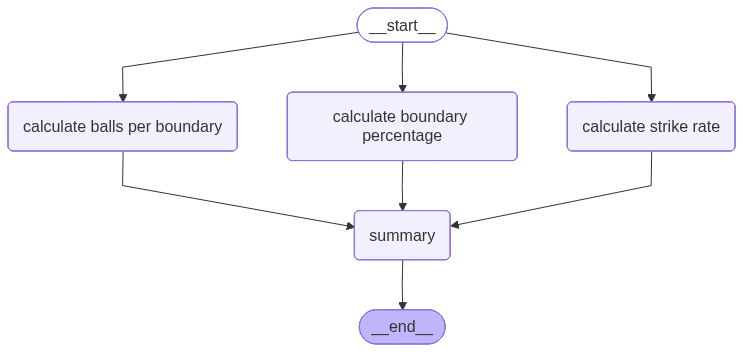

In [122]:
from IPython.display import Image, display

display(Image(workflow.get_graph().draw_mermaid_png()))

In [123]:
output = workflow.invoke({
    'runs': 100,
    'balls': 50,
    'fours': 6,
    'sixs': 4,
    })

In [124]:
output

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixs': 4,
 'strikeRate': 200.0,
 'ballsPerBoundary': 5.0,
 'boundaryPercent': 48.0,
 'summary': '\nStrike Rate: 200.0\nBalls Per Boundary: 5.0\nBoundary Percentage: 48.0'}